In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_main = pd.read_csv("C:/Users/DELL/Desktop/Crop Plantation Suggestor/Data/Crop_recommendation.csv")

In [3]:
data_filt = data_main.copy()

In [4]:
data_filt.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
data_filt.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
data_filt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
data_filt.temperature = round(data_filt.temperature,2)
data_filt.humidity = round(data_filt.humidity,2)
data_filt.ph = round(data_filt.ph,2)
data_filt.rainfall = round(data_filt.rainfall,2)

In [8]:
data_filt.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.88,82.00,6.50,202.94,rice
1,85,58,41,21.77,80.32,7.04,226.66,rice
2,60,55,44,23.00,82.32,7.84,263.96,rice
3,74,35,40,26.49,80.16,6.98,242.86,rice
4,78,42,42,20.13,81.60,7.63,262.72,rice


In [9]:
data_filt['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [10]:
data_filt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [11]:
from sklearn.model_selection import train_test_split

##Seperating 80% of main data as Training Data and 10% as Validation and 10% as Test data

train_size = 0.8

X = data_filt.drop(columns = ['label']).copy()
y = data_filt['label']

##   First Splitting data in Train and Remaining data

X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)

test_size=0.5

X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem,test_size=0.5)


print("Training Data:  ",X_train.shape,y_train.shape)
print("Validation Data:",X_valid.shape,y_valid.shape)
print("Testing Data:   ",X_test.shape,y_test.shape)

Training Data:   (1760, 7) (1760,)
Validation Data: (220, 7) (220,)
Testing Data:    (220, 7) (220,)


In [12]:
X_train.head()

,N,P,K,temperature,humidity,ph,rainfall
418,26,67,24,36.98,37.74,5.64,161.48
1436,87,25,46,27.43,90.03,6.38,21.75
1341,91,7,53,25.14,89.28,6.46,43.53
157,77,58,19,22.81,56.51,5.79,101.60
1105,20,19,35,34.18,50.62,6.11,98.01


## Checking Data Correlation

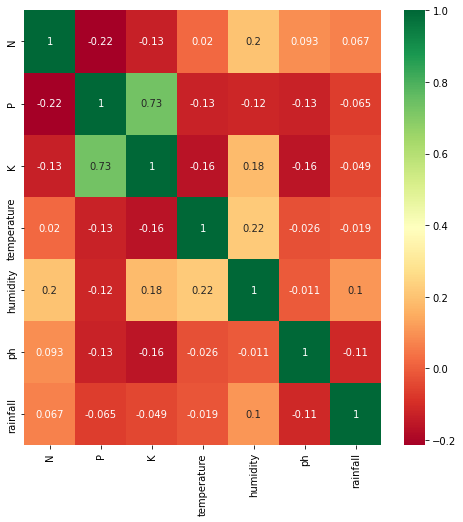

In [23]:
#upp_mat = np.triu(X_train.corr())

plt.figure(figsize = (8,8))
sns.heatmap(X_train.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [14]:
y_train.head()

418     pigeonpeas
1436     muskmelon
1341    watermelon
157          maize
1105         mango
Name: label, dtype: object

## As the target variable is in categorical form we need to do OneHotEncoding

In [15]:
from sklearn.preprocessing import OneHotEncoder

y_train_encode = y_train

y_train_encode = pd.get_dummies(y_train_encode, drop_first=True)

y_train_encode.head()

,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,jute,kidneybeans,lentil,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
418,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1105,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## ---------- OneHotEncoding for Test Data --------------

In [16]:
from sklearn.preprocessing import OneHotEncoder

y_test_encode = y_test

y_test_encode = pd.get_dummies(y_test_encode, drop_first=True)

y_test_encode.head()

,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,jute,kidneybeans,lentil,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
2152,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
853,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2177,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## ----------------- OneHotEncoding for Validation Data ------------------------

In [17]:
from sklearn.preprocessing import OneHotEncoder

y_valid_encode = y_valid

y_valid_encode = pd.get_dummies(y_valid_encode, drop_first=True)

y_valid_encode.head()

,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,jute,kidneybeans,lentil,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
1473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2003,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1685,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2190,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [76]:
## Defining Accuracy and Model list for comparison

acc = []
models = []

## --------- Decision Tree Model ---------------------

In [77]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train,y_train)

#Test Prediction
DT_Test_pred = DecisionTree.predict(X_test)
#Test Accuracy
DT_Test_acc = metrics.accuracy_score(y_test, predicted_values)
print("Decision Tree Test Accuracy : ",DT_Test_acc)
#acc.append(temp)

#Validation Prediction
DT_Valid_pred = DecisionTree.predict(X_valid)
#Validation Accuracy
DT_Valid_acc = metrics.accuracy_score(y_valid, DT_Valid_pred)
print("Decision Tree Validation Accuracy : ",DT_Valid_acc)
acc.append(DT_Valid_acc)

models.append('Decision Tree')

print(classification_report(y_test,predicted_values))

Decision Tree Test Accuracy :  1.0
Decision Tree Validation Accuracy :  0.9272727272727272
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        11
      banana       1.00      1.00      1.00         8
   blackgram       1.00      1.00      1.00         8
    chickpea       1.00      1.00      1.00        10
     coconut       1.00      1.00      1.00        13
      coffee       1.00      1.00      1.00        15
      cotton       1.00      1.00      1.00        14
      grapes       1.00      1.00      1.00         9
        jute       1.00      1.00      1.00         7
 kidneybeans       1.00      1.00      1.00        10
      lentil       1.00      1.00      1.00        13
       maize       1.00      1.00      1.00         8
       mango       1.00      1.00      1.00         7
   mothbeans       1.00      1.00      1.00         9
    mungbean       1.00      1.00      1.00         6
   muskmelon       1.00      1.00      1.00 

## Decision Tree Cross Validation Score

In [78]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(DecisionTree, X_train, y_train,cv=5)
score

array([0.91761364, 0.91477273, 0.88636364, 0.90909091, 0.92897727])

## Saving DecisionTree model using Pickel

In [79]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'models/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Training Naive Bayes Model

In [80]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train,y_train)

#Test data prediction
NB_Test_predict = NaiveBayes.predict(X_test)
#Test Accuracy
NB_Test_acc = metrics.accuracy_score(y_test, NB_Test_predict)
print("Naive Bayes Test Accuracy : ", NB_Test_acc)
#acc.append(temp)

#Validation Data Prediction
NB_Valid_predict = NaiveBayes.predict(X_valid)
#Validation Accuracy
NB_Valid_acc = metrics.accuracy_score(y_valid, NB_Valid_predict)
print("Naive Bayes Validation Accuracy : ", NB_Valid_acc)
acc.append(NB_Valid_acc)
models.append('Naive Bayes')

print(classification_report(y_test,predicted_values))

Naive Bayes Test Accuracy :  1.0
Naive Bayes Validation Accuracy :  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        11
      banana       1.00      1.00      1.00         8
   blackgram       1.00      1.00      1.00         8
    chickpea       1.00      1.00      1.00        10
     coconut       1.00      1.00      1.00        13
      coffee       1.00      1.00      1.00        15
      cotton       1.00      1.00      1.00        14
      grapes       1.00      1.00      1.00         9
        jute       1.00      1.00      1.00         7
 kidneybeans       1.00      1.00      1.00        10
      lentil       1.00      1.00      1.00        13
       maize       1.00      1.00      1.00         8
       mango       1.00      1.00      1.00         7
   mothbeans       1.00      1.00      1.00         9
    mungbean       1.00      1.00      1.00         6
   muskmelon       1.00      1.00      1.00      

# Saving Naive Bayes Model using Pickle

In [81]:
import pickle

NB_Model_Path = "models/NaiveBayes.pkl"

#Open the file to save as pickle file
NB_Model_pkl = open(NB_Model_Path, 'wb')
#Dump the model 
pickle.dump(NaiveBayes, NB_Model_pkl)
#close the pickle file
NB_Model_pkl.close()

#  SVM Model

In [83]:
from sklearn.svm import SVC

# Data Normalization with SVM
from sklearn.preprocessing import MinMaxScaler

# Fit Scaler on Training Data
normal = MinMaxScaler().fit(X_train)
X_train_normal = normal.transform(X_train)

#transform testing data
X_test_normal = normal.transform(X_test)
#transforming Validation Data
X_valid_normal = normal.transform(X_valid)

SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_normal, y_train)

#SVM Test predicting 
SVM_test_predicted_values = SVM.predict(X_test_normal)
#Test accuracy
SVM_Test_Acc = metrics.accuracy_score(y_test, predicted_values)
print("SVM Test Accuracy : ",SVM_Test_Acc)
#acc.append(SVM_Test_Acc)

#SVM Validation Prediction
SVM_Valid_Predict = SVM.predict(X_valid_normal)
#Validation Accuracy
SVM_Valid_Acc = metrics.accuracy_score(y_valid, SVM_Valid_Predict)
print("SVM Validation Accuracy : ",SVM_Valid_Acc)

#acc.append(SVM_Valid_Acc)

models.append("SVM")

print("SVM Accuracy : ",temp*100)
print("")
print(classification_report(y_test,predicted_values))

SVM Test Accuracy :  1.0
SVM Validation Accuracy :  0.9772727272727273
SVM Accuracy :  100.0

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        11
      banana       1.00      1.00      1.00         8
   blackgram       1.00      1.00      1.00         8
    chickpea       1.00      1.00      1.00        10
     coconut       1.00      1.00      1.00        13
      coffee       1.00      1.00      1.00        15
      cotton       1.00      1.00      1.00        14
      grapes       1.00      1.00      1.00         9
        jute       1.00      1.00      1.00         7
 kidneybeans       1.00      1.00      1.00        10
      lentil       1.00      1.00      1.00        13
       maize       1.00      1.00      1.00         8
       mango       1.00      1.00      1.00         7
   mothbeans       1.00      1.00      1.00         9
    mungbean       1.00      1.00      1.00         6
   muskmelon       1.00      1.00      1.

In [92]:
# Cross validation score (SVM)
score = cross_val_score(SVM,X_train,y_train,cv=5)
score

array([0.98295455, 0.98295455, 0.96875   , 0.98863636, 0.98011364])

# Saving SVM model using Pickle

In [93]:
import pickle

SVM_Model_path = "models/SVM.pkl"
SVM_Model_pkl = open(SVM_Model_path, 'wb')

pickle.dump(SVM, SVM_Model_pkl)

SVM_Model_pkl.close()

# Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression

LogisticReg = LogisticRegression(random_state = 2)

LogisticReg.fit(X_train, y_train)

predictedVal = LogisticReg.predict(X_test)
LR_Test_Accuracy = metrics.accuracy_score(y_test, predictedVal)
print("Logistic Regression Test Accuracy : ",LR_Test_Accuracy*100)
#acc.append(LR_Test_Accuracy)


LR_Valid_predict = LogisticReg.predict(X_valid)
LR_Validation_Accuracy = metrics.accuracy_score(y_valid, LR_Valid_predict)
print("Logistic Regression Validation Accuracy : ",LR_Validation_Accuracy*100)

acc.append(LR_Validation_Accuracy)

models.append("Logistic Regression")

print(classification_report(y_test, predictedVal))

Logistic Regression Test Accuracy :  0.9636363636363636
Logistic Regression Validation Accuracy :  97.27272727272728
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        11
      banana       1.00      1.00      1.00         8
   blackgram       0.78      0.88      0.82         8
    chickpea       1.00      1.00      1.00        10
     coconut       1.00      1.00      1.00        13
      coffee       1.00      1.00      1.00        15
      cotton       0.88      1.00      0.93        14
      grapes       1.00      1.00      1.00         9
        jute       1.00      0.86      0.92         7
 kidneybeans       1.00      1.00      1.00        10
      lentil       0.92      0.92      0.92        13
       maize       1.00      0.75      0.86         8
       mango       1.00      1.00      1.00         7
   mothbeans       0.86      0.67      0.75         9
    mungbean       0.86      1.00      0.92         6
   muskmelon      

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Save Logistic Regression model using Pickle

In [96]:
import pickle

LR_Model_path = "models/LogisticRegression.pkl"

LR_Model_pkl = open(LR_Model_path, 'wb')

pickle.dump(LogisticReg, LR_Model_pkl)

LR_Model_pkl.close()

# Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,y_train)

#Test Predict
RF_Test_predict = RF.predict(X_test)
RF_Test_Acc = metrics.accuracy_score(y_test, predicted_values)
print("Random Forest Testing Accuracy : ",RF_Test_Acc)
#acc.append(RF_Test_Acc)

RF_Valid_predict = RF.predict(X_valid)
RF_Valid_accuracy = metrics.accuracy_score(y_valid, RF_Valid_predict)
print("RF's Validation Accuracy : ", RF_Valid_accuracy)
acc.append(temp2)

models.append('RF')
print(classification_report(y_test,predicted_values))

Random Forest Testing Accuracy :  1.0
RF's Validation Accuracy :  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        11
      banana       1.00      1.00      1.00         8
   blackgram       1.00      1.00      1.00         8
    chickpea       1.00      1.00      1.00        10
     coconut       1.00      1.00      1.00        13
      coffee       1.00      1.00      1.00        15
      cotton       1.00      1.00      1.00        14
      grapes       1.00      1.00      1.00         9
        jute       1.00      1.00      1.00         7
 kidneybeans       1.00      1.00      1.00        10
      lentil       1.00      1.00      1.00        13
       maize       1.00      1.00      1.00         8
       mango       1.00      1.00      1.00         7
   mothbeans       1.00      1.00      1.00         9
    mungbean       1.00      1.00      1.00         6
   muskmelon       1.00      1.00      1.00        

# Saving RF Model using Pickle

In [101]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_path = 'models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_path, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

In [109]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train,y_train)

#Test Prediction
XB_Test_predict = XB.predict(X_test)
#Test Accuracy
XB_Test_acc = metrics.accuracy_score(y_test, XB_Test_predict)
print("XGBoost Test Accuracy : ", XB_Test_acc)
#acc.append(XB_Test_acc)

#Validation Prediction
XB_Valid_predict = XB.predict(X_valid)
#Validation Accuracy
XB_Valid_acc = metrics.accuracy_score(y_valid, XB_Valid_predict)
print("XGBoost Validation Accuracy : ", XB_Valid_acc)

acc.append(XB_Valid_acc)

models.append('XGBoost')
print(classification_report(y_test,predicted_values))

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:59:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Test Accuracy :  0.990909090909091
XGBoost Validation Accuracy :  0.9863636363636363
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        11
      banana       1.00      1.00      1.00         8
   blackgram       1.00      1.00      1.00         8
    chickpea       1.00      1.00      1.00        10
     coconut       1.00      1.00      1.00        13
      coffee       1.00      1.00      1.00        15
      cotton       1.00      1.00      1.00        14
      grapes       1.00      1.00      1.00         9
        jute       1.00      1.00      1.00         7
 kidneybeans       1.00      1.00      1.00        10
 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [111]:
print(acc)
models

[0.9272727272727272, 0.990909090909091, 0.9772727272727273, 0.9727272727272728, 0.990909090909091, 0.9863636363636363]


['Decision Tree', 'Naive Bayes', 'SVM', 'Logistic Regression', 'RF', 'XGBoost']

# Saving XGBoost Model

In [112]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_Model_path = 'models/XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_Model_path, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

# Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

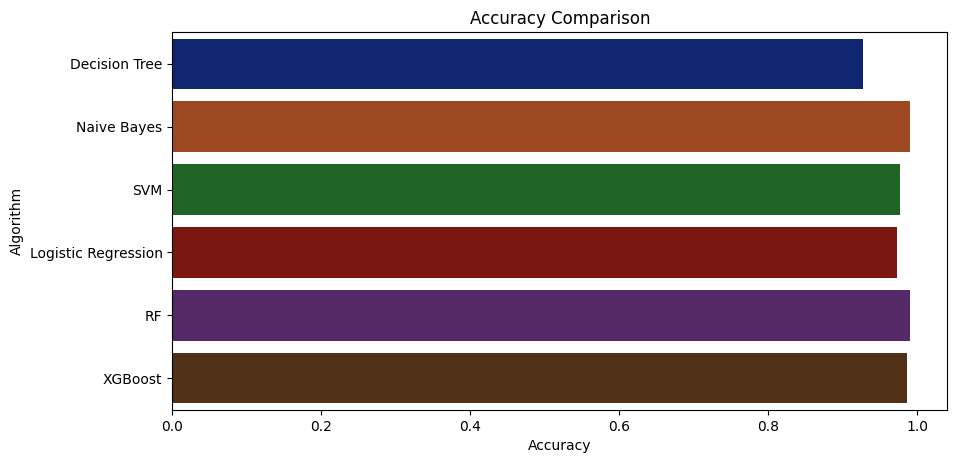

In [116]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = models,palette='dark')

In [118]:
models_accuracy = dict(zip(models, acc))
for k, v in models_accuracy.items():
    print (k, '-->', round(v,2))

Decision Tree --> 0.93
Naive Bayes --> 0.99
SVM --> 0.98
Logistic Regression --> 0.97
RF --> 0.99
XGBoost --> 0.99


# Making a Prediction

In [129]:
data = np.array([[200,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [130]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
